In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Masalembo")
data


,Date,Hours,Hs [m],Angin [m/s]
0,1998-10-30 04:00:00,1,0.250,3.278009
1,1998-10-30 05:00:00,2,0.250,2.625278
2,1998-10-30 06:00:00,3,0.250,2.227879
3,1998-10-30 07:00:00,4,0.250,2.528553
4,1998-10-30 08:00:00,5,0.250,2.701536
...,...,...,...,...
317,1998-11-12 09:00:00,318,0.719,8.174294
318,1998-11-12 10:00:00,319,0.719,8.394081
319,1998-11-12 11:00:00,320,0.719,8.687118
320,1998-11-12 12:00:00,321,0.656,8.901080


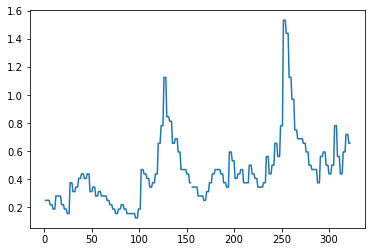

In [4]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [5]:
import copy
data_raw = copy.deepcopy(data)

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Hs [m]'],
                    mode='lines')
)

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


### handling outliers

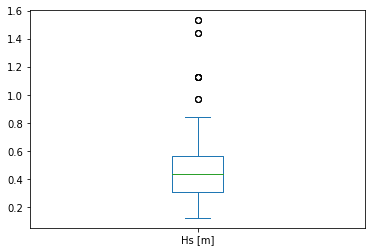

In [ ]:
data['Hs [m]'].plot(kind='box', sharex=False, sharey=False)
plt.show()

In [ ]:
# calculate q1, q3, iqr 
q1 = data['Hs [m]'].quantile(0.25)
q3 = data['Hs [m]'].quantile(0.75)
iqr = q3 - q1

In [ ]:
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ]

125    1.125
126    1.125
127    1.125
257    1.125
258    1.125
259    1.125
260    0.969
261    0.969
262    0.969
Name: Hs [m], dtype: float64

In [ ]:
# outlier atas
data['Hs [m]'].loc[(data['Hs [m]']> q3+(1.5*iqr)) & (data['Hs [m]']<= q3+(3*iqr)) ] = np.nan

#outlier bawah
data['Hs [m]'].loc[(data['Hs [m]']< q1-(1.5*iqr)) & (data['Hs [m]']>= q1-(3*iqr)) ] = np.nan

# nilai ekstrim bawah
data['Hs [m]'].loc[data['Hs [m]']> q3 + (3*iqr) ] = np.nan

# nilai ekstrim atas
data['Hs [m]'].loc[data['Hs [m]']< q1 - (3*iqr) ] = np.nan

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.head()

,Date,Hours,Hs [m],Angin [m/s]
0,1998-10-30 04:00:00,1,0.25,3.278009
1,1998-10-30 05:00:00,2,0.25,2.625278
2,1998-10-30 06:00:00,3,0.25,2.227879
3,1998-10-30 07:00:00,4,0.25,2.528553
4,1998-10-30 08:00:00,5,0.25,2.701536


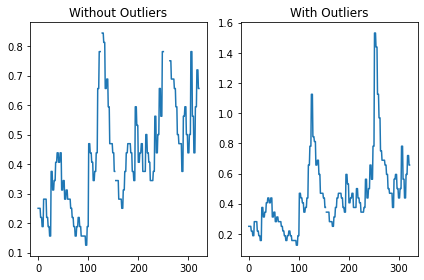

In [ ]:
plt.subplot(121)
plt.plot(data['Hs [m]'])
plt.title('Without Outliers')

plt.subplot(122)
plt.plot(data_raw['Hs [m]'])
plt.title('With Outliers')

plt.tight_layout()

### Interpolation

In [7]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [8]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [9]:
# drop NaN value in dataframe data
data = data.dropna()

In [10]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [11]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [12]:
y_fc=CubicSpline(data['Hours'],data['Hs [m]'],extrapolate=True)

In [13]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [14]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-14-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



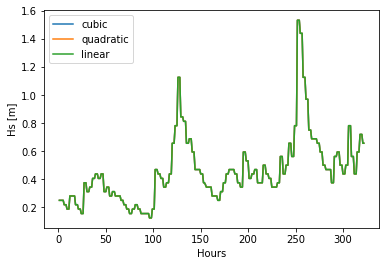

In [15]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='linear')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

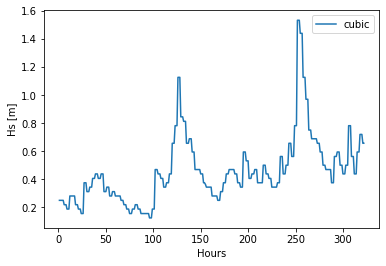

In [16]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

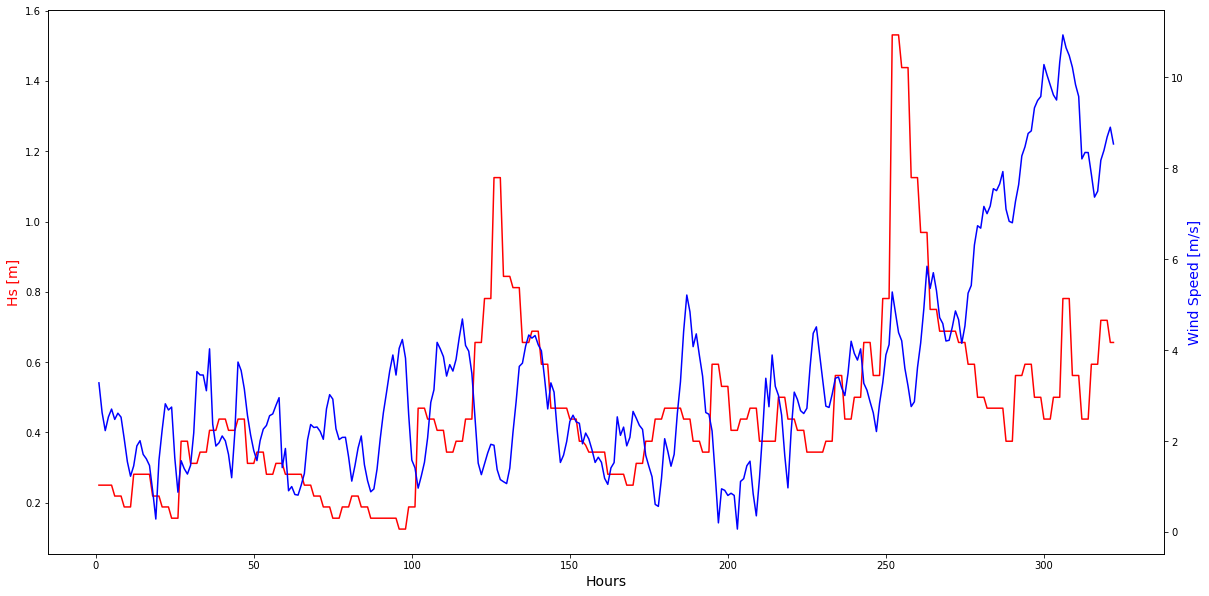

In [17]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data2['Hours'],
        data2['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours", fontsize = 14)
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data2['Hours'],
        data2['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=14)
plt.show()

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Hs [m]'], name="Hs"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data2['Date'], y=data2['Angin [m/s]'], name="Wind"),
    secondary_y=True,
)

# Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b><i>Hs</i> [m]</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>Wind [m/s]</b> ", secondary_y=True)

fig.update_layout( font_size = 14,
                    legend=dict(
                        yanchor="top",
                        y=0.99,
                        xanchor="left",
                        x=0.01,
                        font_size=10)
                    
                    ,
                    yaxis_range=[0,1.8])
fig.show()

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

### splitting data

In [ ]:
hs = data2['Hs [m]']

In [ ]:
len(hs)

322

In [ ]:
hs.head(10)

0    0.250
1    0.250
2    0.250
3    0.250
4    0.250
5    0.219
6    0.219
7    0.219
8    0.188
9    0.188
Name: Hs [m], dtype: float64

In [ ]:
hs.iloc[4:6]

4    0.250
5    0.219
Name: Hs [m], dtype: float64

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 4
X1, y1 = df_to_X_y(hs, WINDOW_SIZE)
X1.shape, y1.shape

((318, 4, 1), (318,))

In [ ]:
X1

array([[[0.25 ],
        [0.25 ],
        [0.25 ],
        [0.25 ]],

       [[0.25 ],
        [0.25 ],
        [0.25 ],
        [0.25 ]],

       [[0.25 ],
        [0.25 ],
        [0.25 ],
        [0.219]],

       ...,

       [[0.594],
        [0.594],
        [0.719],
        [0.719]],

       [[0.594],
        [0.719],
        [0.719],
        [0.719]],

       [[0.719],
        [0.719],
        [0.719],
        [0.656]]])

In [ ]:
X_train1, y_train1 = X1[4:round(len(X1)*0.7)], y1[4:round(len(y1)*0.7)]
X_val1, y_val1 = X1[round(len(X1)*0.7):round(len(X1)*0.8)], y1[round(len(y1)*0.7):round(len(y1)*0.8)]
X_test1, y_test1 = X1[round(len(X1)*0.8):], y1[round(len(X1)*0.8):]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((219, 4, 1), (219,), (31, 4, 1), (31,), (64, 4, 1), (64,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((4, 1)))
model1.add(LSTM(100, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(100, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(200, activation='relu'))
model1.add(RepeatVector(1))
model1.add(LSTM(200, activation='relu'))
model1.add((Dense(100, activation='relu')))
model1.add((Dense(1)))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 1, 100)           0         
 or)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 repeat_vector_4 (RepeatVect  (None, 1, 100)           0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 200)               240800    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 1, 200)          

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.1775 - root_mean_squared_error: 0.4213

7/7 [==============================] - 18s 2s/step - loss: 0.1775 - root_mean_squared_error: 0.4213 - val_loss: 0.6908 - val_root_mean_squared_error: 0.8311
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1654 - root_mean_squared_error: 0.4067

7/7 [==============================] - 8s 1s/step - loss: 0.1739 - root_mean_squared_error: 0.4170 - val_loss: 0.6836 - val_root_mean_squared_error: 0.8268
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.1702 - root_mean_squared_error: 0.4125

7/7 [==============================] - 7s 1s/step - loss: 0.1702 - root_mean_squared_error: 0.4125 - val_loss: 0.6760 - val_root_mean_squared_error: 0.8222
Epoch 4/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1661 - root_mean_squared_error: 0.4075

7/7 [==============================] - 8s 1s/step - loss: 0.1661 - root_mean_squared_error: 0.4075 - val_loss: 0.6679 - val_root_mean_squared_error: 0.8173
Epoch 5/100
7/7 [==============================] - ETA: 0s - loss: 0.1620 - root_mean_squared_error: 0.4024

7/7 [==============================] - 10s 2s/step - loss: 0.1620 - root_mean_squared_error: 0.4024 - val_loss: 0.6591 - val_root_mean_squared_error: 0.8119
Epoch 6/100
7/7 [==============================] - ETA: 0s - loss: 0.1574 - root_mean_squared_error: 0.3968

7/7 [==============================] - 8s 1s/step - loss: 0.1574 - root_mean_squared_error: 0.3968 - val_loss: 0.6499 - val_root_mean_squared_error: 0.8061
Epoch 7/100
7/7 [==============================] - ETA: 0s - loss: 0.1527 - root_mean_squared_error: 0.3908

7/7 [==============================] - 9s 1s/step - loss: 0.1527 - root_mean_squared_error: 0.3908 - val_loss: 0.6400 - val_root_mean_squared_error: 0.8000
Epoch 8/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1471 - root_mean_squared_error: 0.3835

7/7 [==============================] - 7s 1s/step - loss: 0.1478 - root_mean_squared_error: 0.3844 - val_loss: 0.6296 - val_root_mean_squared_error: 0.7935
Epoch 9/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1413 - root_mean_squared_error: 0.3759

7/7 [==============================] - 9s 1s/step - loss: 0.1426 - root_mean_squared_error: 0.3777 - val_loss: 0.6184 - val_root_mean_squared_error: 0.7864
Epoch 10/100
7/7 [==============================] - ETA: 0s - loss: 0.1372 - root_mean_squared_error: 0.3704

7/7 [==============================] - 9s 1s/step - loss: 0.1372 - root_mean_squared_error: 0.3704 - val_loss: 0.6063 - val_root_mean_squared_error: 0.7786
Epoch 11/100
7/7 [==============================] - ETA: 0s - loss: 0.1314 - root_mean_squared_error: 0.3625

7/7 [==============================] - 9s 2s/step - loss: 0.1314 - root_mean_squared_error: 0.3625 - val_loss: 0.5931 - val_root_mean_squared_error: 0.7701
Epoch 12/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1301 - root_mean_squared_error: 0.3607

7/7 [==============================] - 7s 1s/step - loss: 0.1253 - root_mean_squared_error: 0.3539 - val_loss: 0.5786 - val_root_mean_squared_error: 0.7607
Epoch 13/100
7/7 [==============================] - ETA: 0s - loss: 0.1186 - root_mean_squared_error: 0.3445

7/7 [==============================] - 10s 2s/step - loss: 0.1186 - root_mean_squared_error: 0.3445 - val_loss: 0.5627 - val_root_mean_squared_error: 0.7501
Epoch 14/100
6/7 [========================>.....] - ETA: 0s - loss: 0.1097 - root_mean_squared_error: 0.3311

7/7 [==============================] - 8s 1s/step - loss: 0.1116 - root_mean_squared_error: 0.3340 - val_loss: 0.5449 - val_root_mean_squared_error: 0.7382
Epoch 15/100
7/7 [==============================] - ETA: 0s - loss: 0.1040 - root_mean_squared_error: 0.3225

7/7 [==============================] - 8s 1s/step - loss: 0.1040 - root_mean_squared_error: 0.3225 - val_loss: 0.5251 - val_root_mean_squared_error: 0.7246
Epoch 16/100
7/7 [==============================] - ETA: 0s - loss: 0.0959 - root_mean_squared_error: 0.3097

7/7 [==============================] - 7s 1s/step - loss: 0.0959 - root_mean_squared_error: 0.3097 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7090
Epoch 17/100
7/7 [==============================] - ETA: 0s - loss: 0.0873 - root_mean_squared_error: 0.2955

7/7 [==============================] - 9s 1s/step - loss: 0.0873 - root_mean_squared_error: 0.2955 - val_loss: 0.4773 - val_root_mean_squared_error: 0.6909
Epoch 18/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0810 - root_mean_squared_error: 0.2847

7/7 [==============================] - 10s 2s/step - loss: 0.0783 - root_mean_squared_error: 0.2799 - val_loss: 0.4484 - val_root_mean_squared_error: 0.6697
Epoch 19/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0693 - root_mean_squared_error: 0.2633

7/7 [==============================] - 8s 1s/step - loss: 0.0685 - root_mean_squared_error: 0.2617 - val_loss: 0.4165 - val_root_mean_squared_error: 0.6454
Epoch 20/100
7/7 [==============================] - ETA: 0s - loss: 0.0586 - root_mean_squared_error: 0.2421

7/7 [==============================] - 9s 1s/step - loss: 0.0586 - root_mean_squared_error: 0.2421 - val_loss: 0.3806 - val_root_mean_squared_error: 0.6170
Epoch 21/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0466 - root_mean_squared_error: 0.2158

7/7 [==============================] - 7s 1s/step - loss: 0.0484 - root_mean_squared_error: 0.2201 - val_loss: 0.3417 - val_root_mean_squared_error: 0.5845
Epoch 22/100
7/7 [==============================] - ETA: 0s - loss: 0.0397 - root_mean_squared_error: 0.1992

7/7 [==============================] - 11s 2s/step - loss: 0.0397 - root_mean_squared_error: 0.1992 - val_loss: 0.2984 - val_root_mean_squared_error: 0.5462
Epoch 23/100
7/7 [==============================] - ETA: 0s - loss: 0.0316 - root_mean_squared_error: 0.1778

7/7 [==============================] - 8s 1s/step - loss: 0.0316 - root_mean_squared_error: 0.1778 - val_loss: 0.2537 - val_root_mean_squared_error: 0.5037
Epoch 24/100
7/7 [==============================] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1574

7/7 [==============================] - 9s 1s/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.2135 - val_root_mean_squared_error: 0.4621
Epoch 25/100
7/7 [==============================] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1463

7/7 [==============================] - 7s 1s/step - loss: 0.0214 - root_mean_squared_error: 0.1463 - val_loss: 0.1781 - val_root_mean_squared_error: 0.4221
Epoch 26/100
7/7 [==============================] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.1424

7/7 [==============================] - 10s 2s/step - loss: 0.0203 - root_mean_squared_error: 0.1424 - val_loss: 0.1516 - val_root_mean_squared_error: 0.3893
Epoch 27/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0200 - root_mean_squared_error: 0.1414

7/7 [==============================] - 8s 1s/step - loss: 0.0200 - root_mean_squared_error: 0.1414 - val_loss: 0.1388 - val_root_mean_squared_error: 0.3725
Epoch 28/100
7/7 [==============================] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1406

7/7 [==============================] - 8s 1s/step - loss: 0.0198 - root_mean_squared_error: 0.1406 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3657
Epoch 29/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.1372 - val_root_mean_squared_error: 0.3704
Epoch 30/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.1375 - val_root_mean_squared_error: 0.3709
Epoch 31/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - val_loss: 0.1348 - val_root_mean_squared_error: 0.3672
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1323

7/7 [==============================] - 8s 1s/step - loss: 0.0175 - root_mean_squared_error: 0.1323 - val_loss: 0.1296 - val_root_mean_squared_error: 0.3599
Epoch 33/100
7/7 [==============================] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1303

7/7 [==============================] - 14s 2s/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.1212 - val_root_mean_squared_error: 0.3482
Epoch 34/100
7/7 [==============================] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1280

7/7 [==============================] - 9s 1s/step - loss: 0.0164 - root_mean_squared_error: 0.1280 - val_loss: 0.1161 - val_root_mean_squared_error: 0.3407
Epoch 35/100
7/7 [==============================] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.1260

7/7 [==============================] - 7s 1s/step - loss: 0.0159 - root_mean_squared_error: 0.1260 - val_loss: 0.1066 - val_root_mean_squared_error: 0.3264
Epoch 36/100
6/7 [========================>.....] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1223

7/7 [==============================] - 8s 1s/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3167
Epoch 37/100
7/7 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1213

7/7 [==============================] - 9s 1s/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0953 - val_root_mean_squared_error: 0.3087
Epoch 38/100
7/7 [==============================] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1190

7/7 [==============================] - 9s 1s/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0900 - val_root_mean_squared_error: 0.3000
Epoch 39/100
7/7 [==============================] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1166

7/7 [==============================] - 8s 1s/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0878 - val_root_mean_squared_error: 0.2963
Epoch 40/100
7/7 [==============================] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143

7/7 [==============================] - 8s 1s/step - loss: 0.0131 - root_mean_squared_error: 0.1143 - val_loss: 0.0848 - val_root_mean_squared_error: 0.2912
Epoch 41/100
7/7 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1120

7/7 [==============================] - 8s 1s/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2885
Epoch 42/100
7/7 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1098

7/7 [==============================] - 9s 1s/step - loss: 0.0121 - root_mean_squared_error: 0.1098 - val_loss: 0.0814 - val_root_mean_squared_error: 0.2854
Epoch 43/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0829 - val_root_mean_squared_error: 0.2879
Epoch 44/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2923
Epoch 45/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0108 - root_mean_squared_error: 0.1037 - val_loss: 0.0892 - val_root_mean_squared_error: 0.2987
Epoch 46/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0933 - val_root_mean_squared_error: 0.3054
Epoch 47/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0100 - root_mean_squared_error: 0.1002 - val_loss: 0.1033 - val_root_mean_squared_err

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
X_train1

array([[[0.25      ],
        [0.219     ],
        [0.219     ],
        [0.219     ]],

       [[0.219     ],
        [0.219     ],
        [0.219     ],
        [0.188     ]],

       [[0.219     ],
        [0.219     ],
        [0.188     ],
        [0.188     ]],

       [[0.219     ],
        [0.188     ],
        [0.188     ],
        [0.188     ]],

       [[0.188     ],
        [0.188     ],
        [0.188     ],
        [0.281     ]],

       [[0.188     ],
        [0.188     ],
        [0.281     ],
        [0.281     ]],

       [[0.188     ],
        [0.281     ],
        [0.281     ],
        [0.281     ]],

       [[0.281     ],
        [0.281     ],
        [0.281     ],
        [0.281     ]],

       [[0.281     ],
        [0.281     ],
        [0.281     ],
        [0.281     ]],

       [[0.281     ],
        [0.281     ],
        [0.281     ],
        [0.281     ]],

       [[0.281     ],
        [0.281     ],
        [0.281     ],
        [0.219     ]],

       [[0

In [ ]:
y_train1

array([0.188     , 0.188     , 0.188     , 0.281     , 0.281     ,
       0.281     , 0.281     , 0.281     , 0.281     , 0.219     ,
       0.219     , 0.219     , 0.188     , 0.188     , 0.188     ,
       0.156     , 0.156     , 0.156     , 0.375     , 0.375     ,
       0.375     , 0.312     , 0.312     , 0.312     , 0.344     ,
       0.344     , 0.344     , 0.406     , 0.406     , 0.406     ,
       0.438     , 0.438     , 0.438     , 0.406     , 0.406     ,
       0.406     , 0.438     , 0.438     , 0.438     , 0.312     ,
       0.312     , 0.312     , 0.344     , 0.344     , 0.344     ,
       0.281     , 0.281     , 0.281     , 0.312     , 0.312     ,
       0.312     , 0.281     , 0.281     , 0.281     , 0.281     ,
       0.281     , 0.281     , 0.25      , 0.25      , 0.25      ,
       0.219     , 0.219     , 0.219     , 0.188     , 0.188     ,
       0.188     , 0.156     , 0.156     , 0.156     , 0.188     ,
       0.188     , 0.188     , 0.219     , 0.219     , 0.219  

In [ ]:
train_predictions

array([0.33763826, 0.3318713 , 0.32921296, 0.3262184 , 0.32988846,
       0.33793014, 0.34729967, 0.3580383 , 0.3580383 , 0.3580383 ,
       0.35304973, 0.34741578, 0.3411006 , 0.3318713 , 0.32921296,
       0.3262184 , 0.32061476, 0.3179662 , 0.31500092, 0.3278042 ,
       0.3468988 , 0.3699314 , 0.39196497, 0.38559976, 0.37842327,
       0.37329346, 0.37640396, 0.3799979 , 0.38945255, 0.39576906,
       0.40315264, 0.414535  , 0.41800052, 0.42203265, 0.4234959 ,
       0.41997942, 0.41596004, 0.414535  , 0.41800052, 0.42203265,
       0.4146694 , 0.4012776 , 0.38640755, 0.37329346, 0.37640396,
       0.3799979 , 0.37863913, 0.37249538, 0.36558253, 0.36055887,
       0.36346754, 0.36681965, 0.36802173, 0.36507365, 0.36173162,
       0.3580383 , 0.3580383 , 0.3580383 , 0.35553533, 0.35268816,
       0.34946737, 0.34349403, 0.34074336, 0.33763826, 0.3318713 ,
       0.32921296, 0.3262184 , 0.32061476, 0.3179662 , 0.31500092,
       0.31409267, 0.31670102, 0.31968054, 0.32525414, 0.32787

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Univariate':train_predictions, 'Actuals':y_train1})
train_results

7/7 [==============================] - 1s 7ms/step


,Univariate,Actuals
0,0.337638,0.188
1,0.331871,0.188
2,0.329213,0.188
3,0.326218,0.281
4,0.329888,0.281
...,...,...
214,0.423496,0.406
215,0.419979,0.406
216,0.415960,0.344
217,0.405880,0.344


In [ ]:
train_results['Date'] = data2['Date'].iloc[4:round(len(X1)*0.7)+4]
train_results.head()

,Univariate,Actuals,Date
0,0.337638,0.188,NaT
1,0.331871,0.188,NaT
2,0.329213,0.188,NaT
3,0.326218,0.281,NaT
4,0.329888,0.281,1998-10-30 08:00:00


In [ ]:
data2['Date'].iloc[4:]

4     1998-10-30 08:00:00
5     1998-10-30 09:00:00
6     1998-10-30 10:00:00
7     1998-10-30 11:00:00
8     1998-10-30 12:00:00
              ...        
317   1998-11-12 09:00:00
318   1998-11-12 10:00:00
319   1998-11-12 11:00:00
320   1998-11-12 12:00:00
321   1998-11-12 13:00:00
Name: Date, Length: 318, dtype: datetime64[ns]

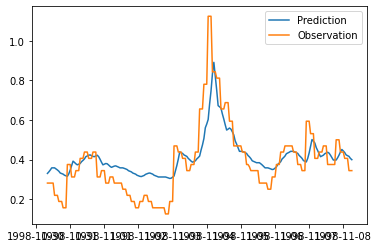

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Date'],train_results['Univariate'], label ='Prediction')
plt.plot(train_results['Date'],train_results['Actuals'], label='Observation')
plt.legend(loc='best')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Training'))
fig.add_trace(go.Scatter(x=train_results['Date'], y=train_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Univariate':val_predictions, 'Actuals':y_val1})
val_results.head()

1/1 [==============================] - 0s 26ms/step


,Univariate,Actuals
0,0.392046,0.344
1,0.384051,0.344
2,0.384051,0.344
3,0.384051,0.375
4,0.386742,0.375


In [ ]:
val_results['Date'] = data2['Date'].iloc[round(len(X1)*0.7):round(len(X1)*0.8)].values
val_results.head()

,Univariate,Actuals,Date
0,0.392046,0.344,1998-11-08 11:00:00
1,0.384051,0.344,1998-11-08 12:00:00
2,0.384051,0.344,1998-11-08 13:00:00
3,0.384051,0.375,1998-11-08 14:00:00
4,0.386742,0.375,1998-11-08 15:00:00


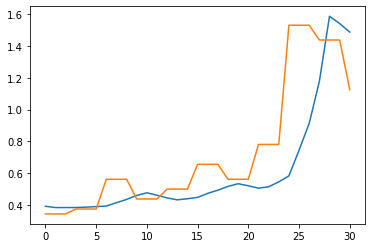

In [ ]:
plt.plot(val_results['Univariate'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Validation'))
fig.add_trace(go.Scatter(x=val_results['Date'], y=val_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Univariate':test_predictions, 'Actuals':y_test1})
test_results.head()

2/2 [==============================] - 0s 9ms/step


,Univariate,Actuals
0,1.325516,1.125
1,1.205286,1.125
2,1.078047,0.969
3,0.917376,0.969
4,0.877642,0.969


In [ ]:
test_results['Date'] = data2['Date'].iloc[round(len(X1)*0.8):round(len(X1))].values
test_results.head()

,Univariate,Actuals,Date
0,1.325516,1.125,1998-11-09 18:00:00
1,1.205286,1.125,1998-11-09 19:00:00
2,1.078047,0.969,1998-11-09 20:00:00
3,0.917376,0.969,1998-11-09 21:00:00
4,0.877642,0.969,1998-11-09 22:00:00


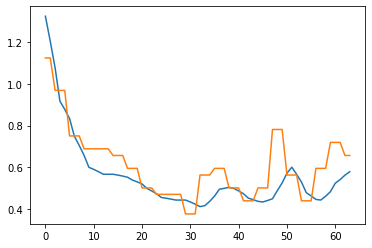

In [ ]:
plt.plot(test_results['Univariate'])
plt.plot(test_results['Actuals'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Univariate'],
                    mode='lines',
                    name='Fitting Data Testing'))
fig.add_trace(go.Scatter(x=test_results['Date'], y=test_results['Actuals'],
                    mode='lines',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>')

In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.11044085308987406

### verif


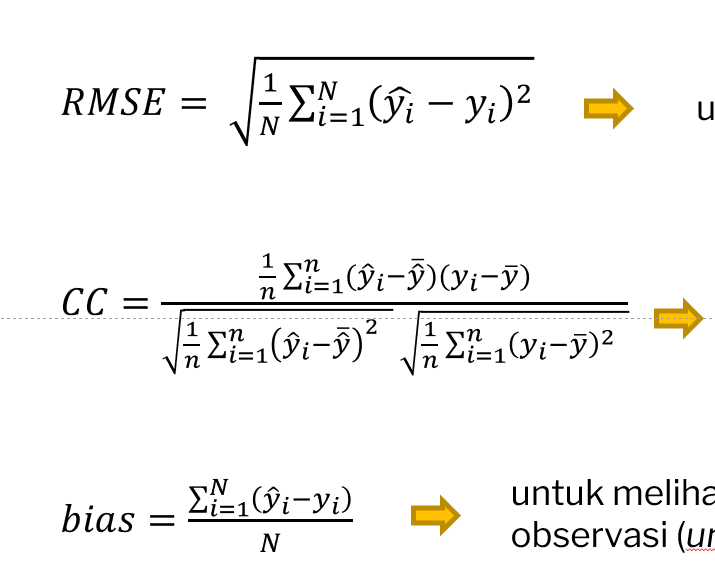

In [ ]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(test_results['Actuals'],test_results['Univariate'])
RMSE = math.sqrt(MSE)
RMSE

0.11044085308987406

In [ ]:
# coefficiect correlation 
mean_pred = test_results['Univariate'].mean()
mean_obv = test_results['Actuals'].mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(test_results['Actuals'])):
  a = test_results['Univariate'][i] - mean_pred
  b = test_results['Actuals'][i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr
 
print(atas, a_sum, b_sum)
konst = 1/len(test_results['Actuals'])
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

1.5860538297202438 2.02918102610749 1.7337797499999994


0.022907332289234635

In [ ]:
konst

0.015625

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_results['Actuals'],test_results['Univariate'])
corr

0.84559141177593

In [ ]:
# bias 
gap_sum = 0
for j in range(len(test_results['Actuals'])):
  gap = test_results['Univariate'][j] - test_results['Actuals'][j]
  gap_sum += gap

bias = gap_sum/len(test_results['Actuals'])
bias

-0.05445275092497468

In [ ]:
train_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_train_lstm_masalembo.csv')
val_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_val_lstm_masalembo.csv')
test_results.to_csv('/content/drive/MyDrive/TA (1)/Learn to Code ML/Hasil Prediksi /univariate_test_lstm_masalembo.csv')

In [ ]:
# serialize weights to HDF5
model1.save_weights("/content/drive/MyDrive/TA (1)/Learn to Code ML/Model/model_univariate_masalembo.h5")
print("Model Saved !")

Model Saved !
